In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import statistics

In [2]:
# Чтение документа и формирование датафрейма
df = pd.read_csv('F:/Рабочий стол/HR.csv') 
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# Просмотр информации по датарфейму. Не имеется ни единого пропуска
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Описание датафрейма в стандартной аггрегации
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [6]:
# Вычисление моды для каждого столбца в датафрейме
df.mode() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Вычисление стандартного отклонения для каждого столбца в датафрейме
np.std(df)

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


satisfaction_level        0.248622
last_evaluation           0.171163
number_project            1.232551
average_montly_hours     49.941434
time_spend_company        1.460088
Work_accident             0.351707
left                      0.425910
promotion_last_5years     0.144277
dtype: float64

In [8]:
# Построение корреляционной матрицы
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_12060\631885882.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_12060\4258344973.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'crest')


<Axes: >

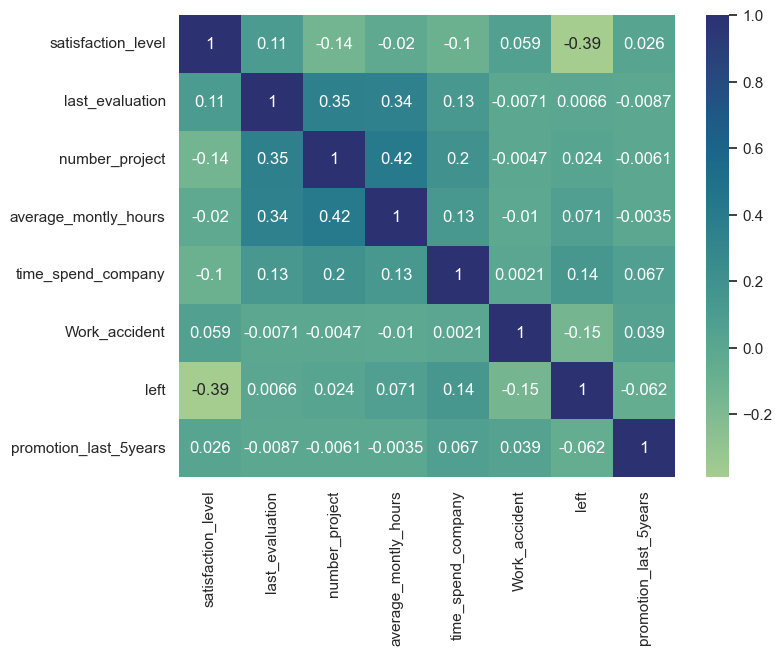

In [9]:
# Создание тепловой карты на основе корреляции датафрейма
sns.set(rc = {'figure.figsize': (8,6)})
sns.heatmap(df.corr(), annot = True, cmap = 'crest')

# Можно заметить по тепловой карте, что самыми скоррелированными переменными являются number_project и average_montly_hours
# что говорит о том, что прослеживается зависимость между количеством проектов, выполненных сотрудников, со средним количеством 
# времени, которое сотрудник проводил на рабочем месте в месяц
# Самыми не скоррелированными являются Work_accident и left, то есть, по корреляции, наличие несчастных случаев не связано со 
# стажем работы в компании

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df.groupby(df['department']).agg(numb_in_department = ('satisfaction_level', pd.Series.count)).sort_values('numb_in_department', ascending = False)
# Наибольшее количество сотрудников работают в департаменте продаж, далее идут технический и депортамент поддержки

,numb_in_department
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [12]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Text(0.5, 1.0, 'Количество сотрудников на разном уровне ЗП')

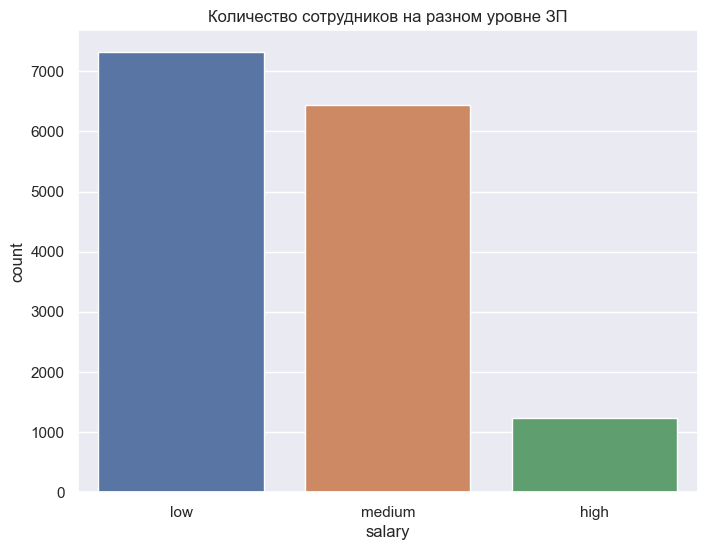

In [13]:
# Визуализация количества сотрудниках с разными уровнями ЗП
sns.countplot(x = 'salary', data = df)
plt.title('Количество сотрудников на разном уровне ЗП')

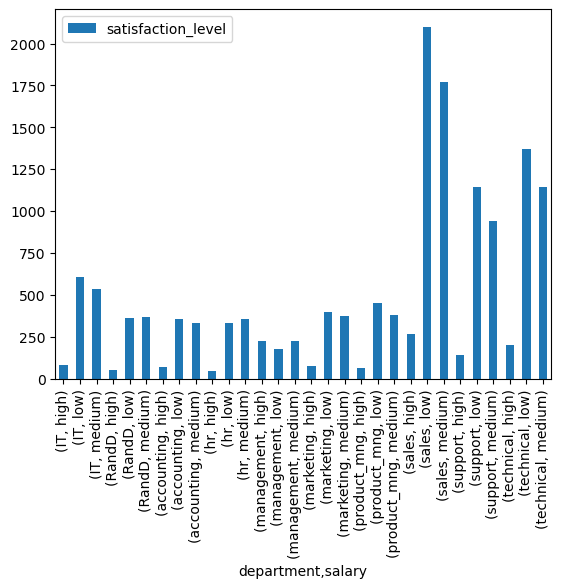

In [9]:
# Визуализация количества сотрудников с разным уровнем зарплат в каждом департаменте
df.loc[:, ['satisfaction_level', 'department', 'salary']].groupby(['department', 'salary']).count().plot(kind = 'bar')
plt.show()

In [15]:
# Формирование списка со среднем временем, проведенным каждым сотрудником с зарплатом уровня low
list_of_low = list(df.loc[df['salary']. isin(['low'])]['average_montly_hours'])
list_of_low

[157,
 223,
 159,
 153,
 247,
 259,
 224,
 142,
 135,
 305,
 234,
 148,
 137,
 143,
 160,
 255,
 160,
 262,
 282,
 147,
 304,
 139,
 158,
 242,
 239,
 135,
 128,
 132,
 294,
 134,
 145,
 140,
 246,
 255,
 137,
 126,
 306,
 152,
 269,
 158,
 127,
 281,
 276,
 182,
 147,
 273,
 148,
 147,
 152,
 135,
 134,
 132,
 307,
 140,
 255,
 309,
 128,
 225,
 295,
 157,
 142,
 140,
 151,
 139,
 249,
 291,
 305,
 232,
 132,
 130,
 291,
 130,
 246,
 143,
 129,
 255,
 155,
 265,
 279,
 284,
 160,
 251,
 133,
 132,
 158,
 135,
 216,
 300,
 138,
 260,
 132,
 183,
 250,
 151,
 292,
 140,
 221,
 138,
 132,
 133,
 283,
 129,
 249,
 257,
 245,
 155,
 256,
 152,
 267,
 151,
 239,
 306,
 263,
 147,
 278,
 154,
 143,
 155,
 160,
 304,
 240,
 305,
 136,
 132,
 301,
 243,
 147,
 239,
 260,
 296,
 129,
 132,
 135,
 158,
 259,
 160,
 278,
 284,
 274,
 164,
 148,
 283,
 304,
 278,
 287,
 285,
 226,
 259,
 135,
 219,
 256,
 254,
 153,
 228,
 228,
 128,
 153,
 156,
 294,
 219,
 153,
 151,
 155,
 158,
 245,
 131,
 225

In [16]:
# Формирование списка со среднем временем, проведенным каждым сотрудником с зарплатом уровня high
list_of_high = list(df.loc[df['salary']. isin(['high'])]['average_montly_hours'])
list_of_high

[149,
 289,
 156,
 129,
 149,
 278,
 156,
 143,
 255,
 161,
 129,
 159,
 148,
 130,
 291,
 258,
 152,
 139,
 217,
 237,
 271,
 130,
 256,
 151,
 254,
 158,
 288,
 259,
 297,
 270,
 306,
 145,
 156,
 155,
 228,
 257,
 266,
 307,
 128,
 143,
 254,
 243,
 146,
 286,
 159,
 131,
 238,
 136,
 144,
 148,
 215,
 172,
 207,
 163,
 225,
 161,
 176,
 99,
 173,
 223,
 265,
 254,
 271,
 242,
 253,
 140,
 251,
 184,
 242,
 127,
 154,
 186,
 170,
 168,
 145,
 275,
 137,
 163,
 237,
 186,
 177,
 228,
 204,
 210,
 250,
 185,
 146,
 217,
 172,
 184,
 171,
 223,
 148,
 140,
 226,
 183,
 135,
 236,
 249,
 170,
 239,
 185,
 186,
 213,
 136,
 148,
 262,
 247,
 195,
 261,
 197,
 263,
 164,
 111,
 194,
 258,
 235,
 267,
 239,
 235,
 176,
 278,
 270,
 238,
 235,
 107,
 243,
 233,
 206,
 172,
 248,
 147,
 259,
 267,
 263,
 211,
 249,
 108,
 165,
 181,
 237,
 180,
 209,
 261,
 154,
 211,
 192,
 228,
 169,
 232,
 214,
 211,
 201,
 226,
 164,
 208,
 172,
 274,
 215,
 262,
 226,
 146,
 248,
 164,
 224,
 197,
 231,

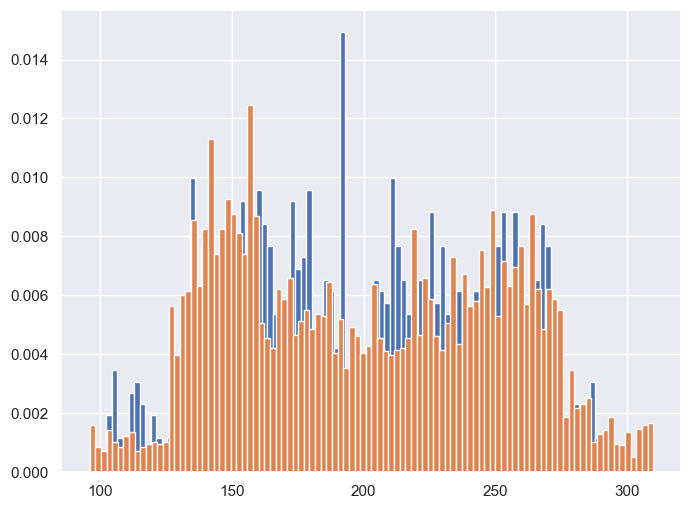

In [154]:
plt.hist(list_of_high, bins=100, density=True);
plt.hist(list_of_low, bins=100, density=True);

In [153]:
stat, p = stats.ttest_ind(list_of_low, list_of_high, equal_var = True)
print(stat, p)
if p > 0.05:
  print("Отклоняем нулевую гипотезу")
else:
  print("Не отклоняем нулевую гипотезу")

# Отклоняем нулевую гипотезу, а значит, что оклад не влияет на рабочее время сотрудника

0.7288680398062308 0.4661023478267259
Отклоняем нулевую гипотезу


In [18]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [155]:
# Вычисление доли сотрудников с повышением за 5 лет, разделенные на группы неуволившихся и уволившихся
df_left = df.loc[df['left'] == 1]
len(df_left.loc[df_left['promotion_last_5years'] == 1])/len(df_left)

0.005320638476617194

In [156]:
df_noleft = df.loc[df['left'] == 0]
len(df_noleft.loc[df_noleft['promotion_last_5years'] == 1])/len(df_noleft)

0.026251312565628283

In [22]:
# ДРУГОЙ ВАРИАНТ Вычисление доли сотрудников с повышением за 5 лет, разделенные на группы неуволившихся и уволившихся
df.groupby('left')['promotion_last_5years'].value_counts(normalize=True)

left  promotion_last_5years
0     0                        0.973749
      1                        0.026251
1     0                        0.994679
      1                        0.005321
Name: promotion_last_5years, dtype: float64

In [23]:
# Вычисление средней степени удовольствия на группы неуволившихся и уволившихся
df.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [24]:
# Вычисление среднего количества проектов на группы неуволившихся и уволившихся
df.groupby('left')['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
left = pd.array(df['left'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.20)

In [12]:
lda = LinearDiscriminantAnalysis()

In [13]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
lda.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
2995,0,0
2996,0,0
2997,1,0
2998,1,0


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))
# Судя по тому, какую оценку модели мы получили, можно сказать, что на увольнение сотрудника влияет довольно мало данных 

0.7526666666666667